### Simple time series model (Autoregressive) on financial data
---------------------------------------------------------------------------------
We are interested in predicting future prices for Ethereum. The method we will be using is Autoregression.  

[Autoregression](https://en.wikipedia.org/wiki/Autoregressive_model) is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

![Image of Autoregression](https://wikimedia.org/api/rest_v1/media/math/render/svg/783f17f3ab83135ed3828b73b0957735a1b63229)   

Linear model  

Suppose that we wish to estimate a linear model using linear least squares. The model can be written as

${\displaystyle \mathbf {y} =\mathbf {X} {\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},}$
where ${\displaystyle \mathbf {X} }$  is a matrix of explanatory variables (the design matrix), β is a vector of unknown parameters to be estimated, and ε is the error vector.


**Ordinary least squares**  
When the weights for each observation are identical and the errors are uncorrelated, the estimated parameters are
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4691ff8bd136a0b8b04083b10ed0c4e76cbbb598" width="125"/>  so the fitted values are <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/da71855e9edabf78fbb874b4cd42ad5a83004bc8" width="200"/>


---------------------

### In Class Example
---------------------

In this practice, we will extract Bitcoin price data from [Yahoo Finance](https://finance.yahoo.com/) page and analyze the patterns of the price and then predict the price for a month.

The packages we will use in the practice are:
* [matplotlib](https://matplotlib.org/)
* [numpy](https://numpy.org/)
* [pandas](https://pandasguide.readthedocs.io/en/latest/)
* [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/)
* [plotly.express](https://plotly.com/python/plotly-express/)    

Import libraries and dataset from sklearn

In [16]:
#we import the package first 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

By using [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/), we can import web data into jupyter notebook. 

#### Dataset Information
Pandas Datareader is a Python package that allows us to create pandas DataFrame objects by accessing data from the different internet sources, and it is convenient to use Pandas Datareader to get realtime stock price datasets. The columns are: High, Low, Open, Close, Volume, and Adj Clsoe.

Read the Bitcoin price data from Yahoo Finance by Pandas Datareader. We extract the data from 2021-01-01 to 2021-09-07.

In [11]:
#now we load the data from the yahoo finance, we specify the kind of data we want, and th
data = web.DataReader('BTC-USD',
                    'yahoo',
                     start = '2021-01-01',
                      end = '2021-09-07'
                     )

look dataset

In [12]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688


extract only the first 30 days data from Close column and make it into data frame as our training data.

In [13]:
train_df = pd.DataFrame(data['Close'].iloc[:30])
train_df.head()

,Close
Date,
2021-01-01,29374.152344
2021-01-02,32127.267578
2021-01-03,32782.023438
2021-01-04,31971.914062
2021-01-05,33992.429688


plot the time series and see what does it look like

Text(0.5, 1.0, 'Bitcoin Daily Price for 2021 January')

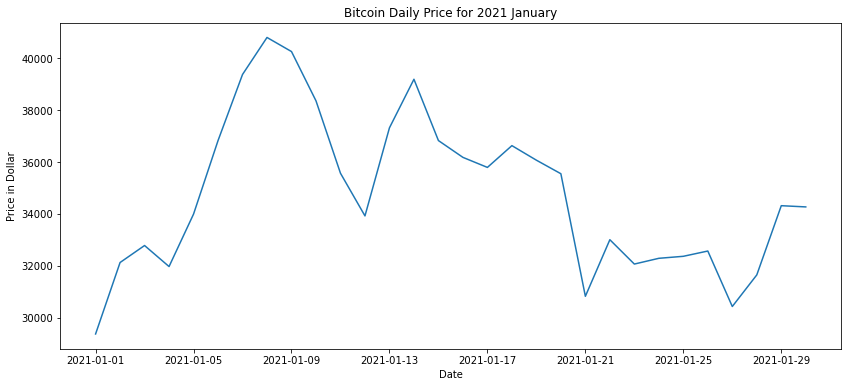

In [14]:
#plot the time series and see what does it look like.
plt.figure(figsize=(14,6))
plt.plot(train_df['Close'])
plt.xlabel('Date')
plt.ylabel('Price in Dollar')
plt.title('Bitcoin Daily Price for 2021 January')

We now plot High, Low, Close, and Open prices against each other and see their differences.

In [17]:
fig = px.line(data,y=['High','Low','Close','Open'],
        title='Bitcoin Price Comparision for High, Low, Close, and Open',
        labels={'value':'Price'})
fig.show()

See train data

In [7]:
fig = px.line(train_df,title='Train data (one month)')
fig.show("png")

To creat lag 1 data, we need to shift the value by one cell below to create lag 1. We can use .shift(1) to move the whole column data one cell below.

In [8]:
train_df['lag_1'] = train_df['Close'].shift(1) #move one data down 1 day
train_df.head()

,Close,lag_1
Date,,
2021-01-01,29374.152344,NaN
2021-01-02,32127.267578,29374.152344
2021-01-03,32782.023438,32127.267578
2021-01-04,31971.914062,32782.023438
2021-01-05,33992.429688,31971.914062


Next, we want to create extra lag 2 all the way to lag 7 and put them into our training dataset

In [9]:
for i in range(2,8):
    train_df[f'lag_{i}'] = train_df['Close'].shift(i)
train_df.head(8)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-01,29374.152344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,32127.267578,29374.152344,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,32782.023438,32127.267578,29374.152344,NaN,NaN,NaN,NaN,NaN
2021-01-04,31971.914062,32782.023438,32127.267578,29374.152344,NaN,NaN,NaN,NaN
2021-01-05,33992.429688,31971.914062,32782.023438,32127.267578,29374.152344,NaN,NaN,NaN
2021-01-06,36824.363281,33992.429688,31971.914062,32782.023438,32127.267578,29374.152344,NaN,NaN
2021-01-07,39371.042969,36824.363281,33992.429688,31971.914062,32782.023438,32127.267578,29374.152344,NaN
2021-01-08,40797.609375,39371.042969,36824.363281,33992.429688,31971.914062,32782.023438,32127.267578,29374.152344


Drop any NaN in our dataset

In [10]:
train_df = train_df.dropna()
train_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-08,40797.609375,39371.042969,36824.363281,33992.429688,31971.914062,32782.023438,32127.267578,29374.152344
2021-01-09,40254.546875,40797.609375,39371.042969,36824.363281,33992.429688,31971.914062,32782.023438,32127.267578
2021-01-10,38356.441406,40254.546875,40797.609375,39371.042969,36824.363281,33992.429688,31971.914062,32782.023438
2021-01-11,35566.656250,38356.441406,40254.546875,40797.609375,39371.042969,36824.363281,33992.429688,31971.914062
2021-01-12,33922.960938,35566.656250,38356.441406,40254.546875,40797.609375,39371.042969,36824.363281,33992.429688


#### The model we want to try is:
##### (weight1 * lag1) + (weight2 * lag2) + (weight3 * lag3) + (weight4 * lag4) + (weight5 * lag5) + (weight6 * lag6) + (weight7 * lag7) = Close

* Thus, we basically regress lag1 through lag7 on Close price.  
* We make another data frame for lag1 to lag7 as matrix X, and the Close price as vector y  
* Then we use matrix operation to calculate our coefficients w_hat  
* w_hat will be our coefficients vector

In [11]:
cols = [f'lag_{i}' for i in range(1,8)]

A=train_df[cols].to_numpy()

y=train_df['Close'].to_numpy()

##### Matrix operation of coefficient  and prediction
w_hat = $ (A^TA)^{-1}A^TY $  
$\hat{y} = A\times$ w_hat

In [12]:
w_hat = np.linalg.inv(A.T @ A) @ A.T@y

Create a new column for the prediction in the train data frame

In [13]:
train_df['predictions'] = A @ w_hat
train_df['predictions'].head()

Date
2021-01-08    38615.115261
2021-01-09    39596.739735
2021-01-10    38433.043816
2021-01-11    37873.943741
2021-01-12    36099.906712
Name: predictions, dtype: float64

Plot the true Close value and prediction

In [14]:
fig = px.line(train_df,y=['Close','predictions'],
        title='Prediction vs True BTC Price',
       labels={'value':'Price'})
fig.show("png")

The model fairly capture the trend. We want to include an intercept in our model to introduce some bias. Thus, we add a ones column in the train data frame

In [15]:
train_df['ones'] = np.ones(len(train_df['Close']))

Next, we create a X matrix again but with ones column in it, and we name it X_bias

In [16]:
cols = [f'lag_{i}' for i in range(1,8)]
cols.append('ones')
print(cols)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'ones']


use the list we created to extract the columns from train data set

In [17]:
A_bias = train_df[cols].to_numpy()

We repeat the matrix operation we did before, but now we use X_bias and name the coefficient vector as w_hat_bias

In [18]:
w_hat_bias = np.linalg.inv(A_bias.T @ A_bias)@ A_bias.T@y

We calculate the predictions again but this time with bias and then put them to the train data frame

In [19]:
train_df['predictions_with_bias'] = A_bias @ w_hat_bias

We now plot the Close price, prediction without bias and prediction with bias together

In [20]:
fig = px.line(train_df,y=['Close','predictions','predictions_with_bias'],
       title='True BTC Price vs Prediction without bias vs Prediction with bias',
       labels={'value':'Price'})
fig.show("png")

Next we calculate the Loss by using root mean square error (RMSE) for prediction without (y_hat1) and with (y_hat2) bias 
  
$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [21]:
y_hat1 = train_df['predictions'].to_numpy()
y_hat2 = train_df['predictions_with_bias'].to_numpy()

In [22]:
def RMSE(labels,predictions):
    return np.sqrt((labels - predictions)@(labels-predictions))

In [23]:
print(f'In-Sample RMSE without bias = {RMSE(y,y_hat1)}\n')
print(f'In-Sample RMSE with bias = {RMSE(y,y_hat2)}')

In-Sample RMSE without bias = 7823.553138789291

In-Sample RMSE with bias = 7313.390013470579


We see that In-Sample RMSE with bias has smaller RMSE because it introduce a little bias in the model

In [24]:
fig = px.line(data,y='Close')
fig.show("png")

We see there is some great variation in the plot, so we want to try to take log to stablize the variation.

In [25]:
data['log_Close'] = np.log(data['Close'])
fig = px.line(data,y='log_Close')
fig.show("png")


#### Conclusion  
we should include bias term in the linear model so that the loss will be smaller, and when the time series data has great variation, we can take log of the data to mitigate the great variance in the series.

-------------------------------

### Implementation on Different Dataset
---------------------

In this practice, we will extract Ethereum price data from [Yahoo Finance](https://finance.yahoo.com/) page and analyze the patterns of the price and then predict the price for a month.

The packages we will use in the practice are:
* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandasguide.readthedocs.io/en/latest/)
* [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/)
* [plotly.express](https://plotly.com/python/plotly-express/)    

By using [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/), we can import web data into jupyter notebook. 

#### Dataset Information
Pandas Datareader is a Python package that allows us to create pandas DataFrame objects by accessing data from the different internet sources, and it is convenient to use Pandas Datareader to get realtime stock price datasets.

So first we import the packages we mentioned above and read the Ethereum price data from Yahoo Finance by Pandas Datareader. We extract the data from 2021-01-01 to 2021-09-07.

In [26]:
#we import the package first 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.express as px

In [27]:
#now we load the data from yahoo finance, we specify the name of dataset we want (ETH), from which data source (yahoo) and the time frame of the data. 
data = web.DataReader(name='ETH-USD',
                    data_source='yahoo',
                     start = '2021-01-01',
                      end = '2021-09-07'
                     )



See what does the dataframe look like.

In [28]:
#let's see what does the beginning of the dataset look like
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104


In [29]:
#let's see what does the end of the dataset look like
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-03,3969.448730,3837.931152,3937.910156,3887.828369,20806963328,3887.828369
2021-09-04,3979.186523,3838.487305,3886.331055,3952.133545,18371468576,3952.133545
2021-09-05,3968.426514,3868.994385,3951.520752,3928.379395,18674691198,3928.379395
2021-09-06,3945.314209,3062.222412,3926.527588,3426.394287,39131346397,3426.394287
2021-09-07,3559.121338,3224.764893,3428.378174,3497.315186,31738430771,3497.315186


We now want to extract only the first 30 days data from Close column and make it into data frame as our training data.

In [30]:
#extract only the first 30 days data from Close column and make it into data frame
train_df = pd.DataFrame(data['Close'].iloc[:31])
#check what does it look like
train_df.head()

,Close
Date,
2021-01-01,730.367554
2021-01-02,774.534973
2021-01-03,975.507690
2021-01-04,1040.233032
2021-01-05,1100.006104


We now plot the time series and see what does it look like.

Text(0.5, 1.0, 'Ethereum Daily Price for 2021 January')

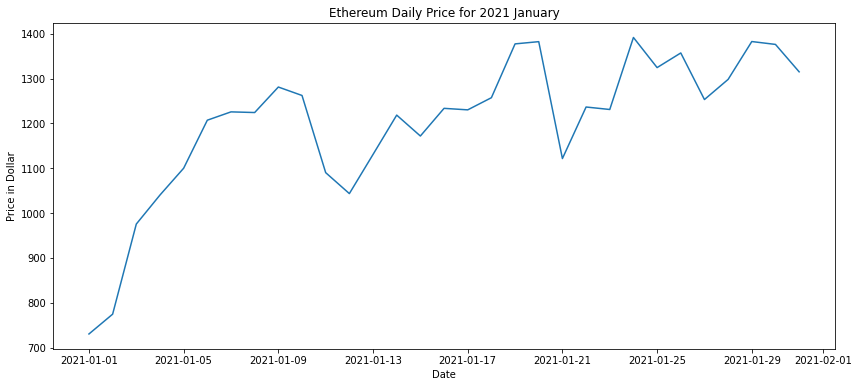

In [31]:
#plot the time series and see what does it look like.
plt.figure(figsize=(14,6))
plt.plot(train_df['Close'])
plt.xlabel('Date')
plt.ylabel('Price in Dollar')
plt.title('Ethereum Daily Price for 2021 January')

We now plot High, Low, Close, and Open prices against each other and see their differences.

In [32]:
#see how high, low, close, and open prices different with each other
# px.line(train_df)
# px.line(data)
# px.line(train_df)
fig = px.line(data,y=['High','Low','Close','Open'],
        title='ETH Price Comparision for High, Low, Close, and Open',
        labels={'value':'Price'})
fig.show("png")
# plt.ylabel('Price in Dollar')
# plt.title('Ethereum Daily Price for 2021 January')

To creat lag 1 data, we need to shift the value by one cell below to create lag 1.
We can use .shift(1) to move the whole column data one cell below.

In [33]:
#  we need to shift the value down to create lag 1
#we will use .shift(1) to move the whole column data one cell down
train_df['lag_1'] = train_df['Close'].shift(1) 
train_df.head()

,Close,lag_1
Date,,
2021-01-01,730.367554,NaN
2021-01-02,774.534973,730.367554
2021-01-03,975.507690,774.534973
2021-01-04,1040.233032,975.507690
2021-01-05,1100.006104,1040.233032


Next, we want to create extra lag 2 all the way to lag 7 and put them into our training dataset

In [34]:
#now we want to create extra lag 2 all the way to lag 7 and put them into our training dataset
for i in range(2,8):
    train_df[f'lag_{i}'] = train_df['Close'].shift(i)
train_df.head(8)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-01,730.367554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,774.534973,730.367554,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,975.507690,774.534973,730.367554,NaN,NaN,NaN,NaN,NaN
2021-01-04,1040.233032,975.507690,774.534973,730.367554,NaN,NaN,NaN,NaN
2021-01-05,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN,NaN,NaN
2021-01-06,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN,NaN
2021-01-07,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554


Drop any NaN in our dataset

In [35]:
#we want to drop any NaN in our dataset
train_df = train_df.dropna()
train_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973
2021-01-10,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690
2021-01-11,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032
2021-01-12,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104


### The model we want to try is:
#### (weight1 * lag1) + (weight2 * lag2) + (weight3 * lag3) + (weight4 * lag4) + (weight5 * lag5) + (weight6 * lag6) + (weight7 * lag7) = Close

* Thus, we basically regress lag1 through lag7 on Close price.  
* We make another data frame for lag1 to lag7 as matrix X, and the Close price as vector y  
* Then we use matrix operation to calculate our coefficients w_hat  
* w_hat will be our coefficients vector

In [36]:
cols = [f'lag_{i}' for i in range(1,8)]

X=train_df[cols].to_numpy()

y=train_df['Close'].to_numpy()

#Aw=y impossoble to invert(dim of the matrix)
#AtAw=Aty
#w_hat = (AtA)^-1Aty

##### Matrix operation of coefficient  and prediction
w_hat = $ (X^TX)^{-1}X^TY $  
$\hat{y} = X\times$ w_hat


In [37]:
w_hat = np.linalg.inv(X.T @ X) @ X.T@y

Create a new column for the prediction in the train data frame

In [38]:
# We create a new column for the prediction in the train data frame
train_df['predictions'] = X @ w_hat
train_df['predictions'].head()

Date
2021-01-08    1159.202465
2021-01-09    1216.917385
2021-01-10    1272.279175
2021-01-11    1259.625353
2021-01-12    1153.395845
Name: predictions, dtype: float64

Plot the true Close value and prediction

In [39]:
#we now plot the true close value and prediction
fig = px.line(train_df,y=['Close','predictions'],
        title='Prediction vs True ETH Price',
       labels={'value':'Price'})  #need an intercept (bias) -> w1lag1+....w7lag7+wi1(intercept) = close
fig.show("png")

The model fairly capture the trend. We want to include an intercept in our model to introduce some bias. Thus, we add a *ones* column in the train data frame

In [40]:
train_df['ones'] = np.ones(len(train_df['Close']))

Next, we create a X matrix again but with ones column in it, and we name it X_bias

In [41]:
#create a list that has column names for X_bias matrix
cols = [f'lag_{i}' for i in range(1,8)]
cols.append('ones')
print(cols)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'ones']


In [42]:
# use the list we created to extract the columns from train data set
X_bias = train_df[cols].to_numpy()

We repeat the matrix operation we did before, but now we use X_bias and name the coefficient vector as w_hat_bias

In [43]:
w_hat_bias = np.linalg.inv(X_bias.T @ X_bias)@ X_bias.T@y

We calculate the predictions again but this time with bias and then put them to the train data frame

In [44]:
train_df['predictions_with_bias'] = X_bias @ w_hat_bias

We now plot the Close price, prediction without bias and prediction with bias together

In [45]:
fig =  px.line(train_df,y=['Close','predictions','predictions_with_bias'],
       title='True ETH Price vs Prediction without bias vs Prediction with bias',
       labels={'value':'Price'})
fig.show("png")

Next we calculate the Loss by using root mean square error (RMSE) for prediction without (y_hat1) and with (y_hat2) bias 
  
$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


In [46]:
y_hat1 = train_df['predictions'].to_numpy()
y_hat2 = train_df['predictions_with_bias'].to_numpy()

In [47]:
def RMSE(labels,predictions):
    return np.sqrt((labels - predictions)@(labels-predictions))

In [48]:
print(f'In-Sample RMSE without bias = {RMSE(y,y_hat1)}\n')
print(f'In-Sample RMSE with bias = {RMSE(y,y_hat2)}')

In-Sample RMSE without bias = 388.6541180710275

In-Sample RMSE with bias = 370.31336094093814


We see that In-Sample RMSE with bias has smaller RMSE because it introduce a little bias in the model

In [49]:
fig = px.line(data,y='Close')
fig.show("png")

We see there is some great variation in the plot, so we want to try to take log to stablize the variation.

In [50]:
data['log_Close'] = np.log(data['Close'])
fig = px.line(data,y='log_Close')
fig.show("png")

In conclusion, we should include bias term in the linear model so that the loss will be smaller, and when the time series data has great variation, we can take log of the data to mitigate the great variance in the series. 